In [1]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [3]:
data = []
conversation = 'WhatsApp Chat with 4 IDIOTS FOR LIFE🔥.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [4]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

            Date   Time          Author  \
17635 2022-05-19  10:00      Aditya Vit   
17636 2022-05-19  10:00  Nibba UltraPro   
17637 2022-05-19  10:00  Nibba UltraPro   
17638 2022-05-19  10:00  Nibba UltraPro   
17639 2022-05-19  10:47            Basu   
17640 2022-05-19  10:47            Basu   
17641 2022-05-19  22:06            Basu   
17642 2022-05-19  22:08  Nibba UltraPro   
17643 2022-05-19  22:08  Nibba UltraPro   
17644 2022-05-19  22:08  Nibba UltraPro   
17645 2022-05-19  22:08  Nibba UltraPro   
17646 2022-05-19  22:08  Nibba UltraPro   
17647 2022-05-19  22:09            Basu   
17648 2022-05-19  22:09            Basu   
17649 2022-05-19  22:09  Nibba UltraPro   
17650 2022-05-19  22:09            Basu   
17651 2022-05-19  22:46  Nibba UltraPro   
17652 2022-05-19  22:46  Nibba UltraPro   
17653 2022-05-19  22:46  Nibba UltraPro   
17654 2022-05-19  22:46  Nibba UltraPro   

                                                 Message  
17635                                

In [5]:
total_messages = df.shape[0]
print(total_messages)

17655


In [6]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

1814


In [7]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [8]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats in 4 idiots fo life")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

Chats in 4 idiots fo life
Total Messages:  17655
Number of Media Shared:  1814
Number of Emojis Shared 0
Number of Links Shared 159


In [16]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Basu", "Aditya Vit","Nibba UltraPro","😃"]
for i in range(len(l)):
    req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
    print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
    print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average Words per message', words_per_message)
  #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    print('Media Messages Sent', media)
  # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    print('Emojis Sent', emojis)
  #links consist of total links
    links = sum(req_df["urlcount"])   
    print('Links Sent', links)

Stats of Basu -
Messages Sent 6202
Average Words per message 3.601096420509513
Media Messages Sent 775
Emojis Sent 0
Links Sent 3
Stats of Aditya Vit -
Messages Sent 416
Average Words per message 4.625
Media Messages Sent 200
Emojis Sent 0
Links Sent 0
Stats of Nibba UltraPro -
Messages Sent 5610
Average Words per message 3.9705882352941178
Media Messages Sent 538
Emojis Sent 0
Links Sent 2
Stats of 😃 -
Messages Sent 3295
Average Words per message 4.721092564491654
Media Messages Sent 301
Emojis Sent 0
Links Sent 3


In [19]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
    print(i)
    emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    import plotly.express as px
    fig = px.pie(emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

There are 319264 words in all the messages.


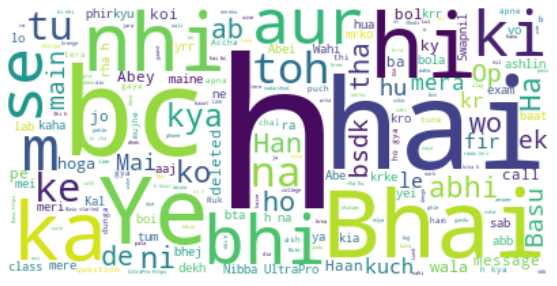

In [20]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Basu


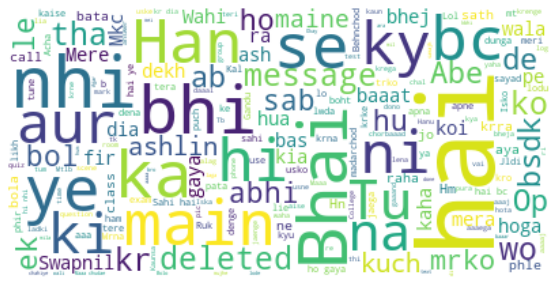

Author name Aditya Vit


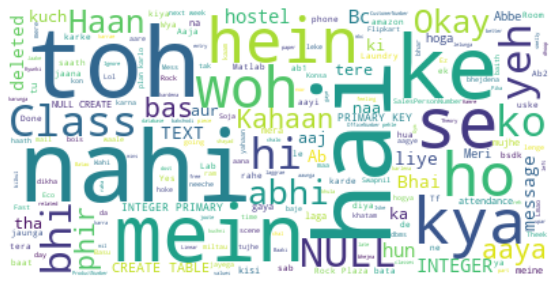

Author name Nibba UltraPro


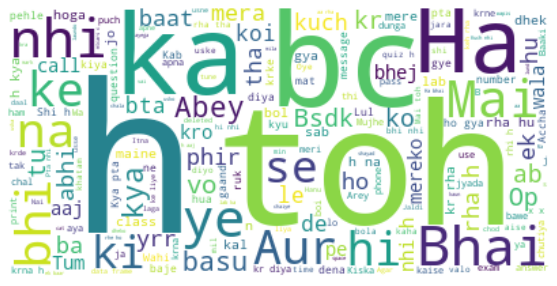

Author name 😃


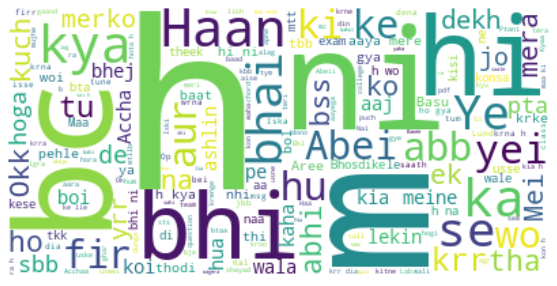

In [21]:
l = ["Basu", "Aditya Vit","Nibba UltraPro","😃"]
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
  #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
    plt.figure( figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()